1. Lav en metode der tjekker om det er fredag ved at webscrape på følgende link (Metoden skal returnere Ja eller Nej)
https://www.erdetfredag.dk/


2. Lav en metode der returnerer top 5 mest populære opskrifter fra nemlig.com.
https://www.nemlig.com/

3. Lav en metode der kan finde den totale pris af disse fire udvalgte varer på nemlig.com
(Gær, Minimælk, Banan, Tomatpasta)

4. Lav et barchart over alle Womens Fiction bøgerne på følgende hjemmeside. Sorter efter pris.
http://books.toscrape.com/index.html
"

## 1

In [18]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from selenium.webdriver.common.action_chains import ActionChains

import bs4
import json

url = 'https://www.erdetfredag.dk'
def er_det_fredag():
    profile = webdriver.FirefoxProfile()
    profile.set_preference("general.useragent.override", "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0")
    
    # headless is needed here because we do not have a GUI version of firefox
    options = Options()
    options.headless = True
    # driver = webdriver.Firefox(options=options, executable_path=r'/tmp/geckodriver')
    browser = webdriver.Firefox(options=options)
    
    
    
    # browser = webdriver.Firefox()
    browser.get(url)
    browser.implicitly_wait(3)
    
    soup = bs4.BeautifulSoup(browser.page_source, 'html.parser')
    browser.close()
    return soup.select('.no')[0].getText()


print(er_det_fredag())

Nej


## 2

In [16]:
url = 'https://www.nemlig.com/opskrifter/mest-populaere'
def top_5():
    profile = webdriver.FirefoxProfile()
    profile.set_preference("general.useragent.override", "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0")
    
    options = Options()
    options.headless = True
    
    browser = webdriver.Firefox(options=options)
    
    
    browser.get(url)
    browser.implicitly_wait(10)
    
    try:
        WebDriverWait(browser,20).until(EC.element_to_be_clickable((By.XPATH, '/html/body/div[1]/div/div/div[1]/div[2]/div[1]/button[1]'))).click()
    except Exception as e:
        print('EXCEPTION:',e)
    soup = bs4.BeautifulSoup(browser.page_source, 'html.parser')
    elements = soup.select('.recipelist-item__header')
    names = []
    for x in range(5):
        names.append(elements[x].getText())
    
    browser.close()
    return names
top_5()

['\n\t\t\t\t\tPanang karry\n\t\t\t\t',
 '\n\t\t\t\t\tNem Tikka Masala\n\t\t\t\t',
 '\n\t\t\t\t\tNem pasta i cremet svampesauce\n\t\t\t\t',
 '\n\t\t\t\t\tKartoffel-porresuppe\n\t\t\t\t',
 '\n\t\t\t\t\tKalkun stroganoff \n\t\t\t\t']

## 3

In [40]:
vare_navne = ['gær', 'minimælk', 'banan', 'tomatpasta']
import time

url = 'https://www.nemlig.com/dagligvarer?search='
def total_price():
    profile = webdriver.FirefoxProfile()
    profile.set_preference("general.useragent.override", "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0")
    options = Options()
    options.headless = True    
    browser = webdriver.Firefox(options=options)
    
    total_price = 0
    for item in vare_navne:
        browser.get(url + item)
        browser.implicitly_wait(5)
        time.sleep(3)
        soup = bs4.BeautifulSoup(browser.page_source, 'html.parser')
        
        soup2 = soup.select('.searchresult__item-container')[0]
        #print(soup2)
        
        x = 0
        while(soup2.select('.pricecontainer__price')[x].getText() == 'NaN'):
            x += 1
        
        y = 0
        while(soup2.select('.pricecontainer__price_superscript')[y].getText() == '0NaN'):
            y += 1
        
        price1 = soup2.select('.pricecontainer__price')[x].getText()
        price2 = soup2.select('.pricecontainer__price_superscript')[y].getText()
        total_price += float(price1) + float(price2)/100

    
    
    return total_price
print(total_price())

27.5


In [ ]:
import requests
import pandas as pd

r = requests.get('http://books.toscrape.com/catalogue/category/books/womens-fiction_9/index.html')
r.raise_for_status()
soup = bs4.BeautifulSoup(r.text, 'html.parser')
books = soup.select('ol[class="row"]')[0]
book_list = books.select('li')

names = []
prices = []

for book in book_list:
    names.append(book.select('a')[1]['title'])
    prices.append(book.select('p[class="price_color"]')[0].getText()[2:])

book_dict = {'Title': names, 'Price': prices}

df = pd.DataFrame(book_dict)

df = df.sort_values('Price', ascending=True)
print(df)

<IPython.core.display.Javascript object>


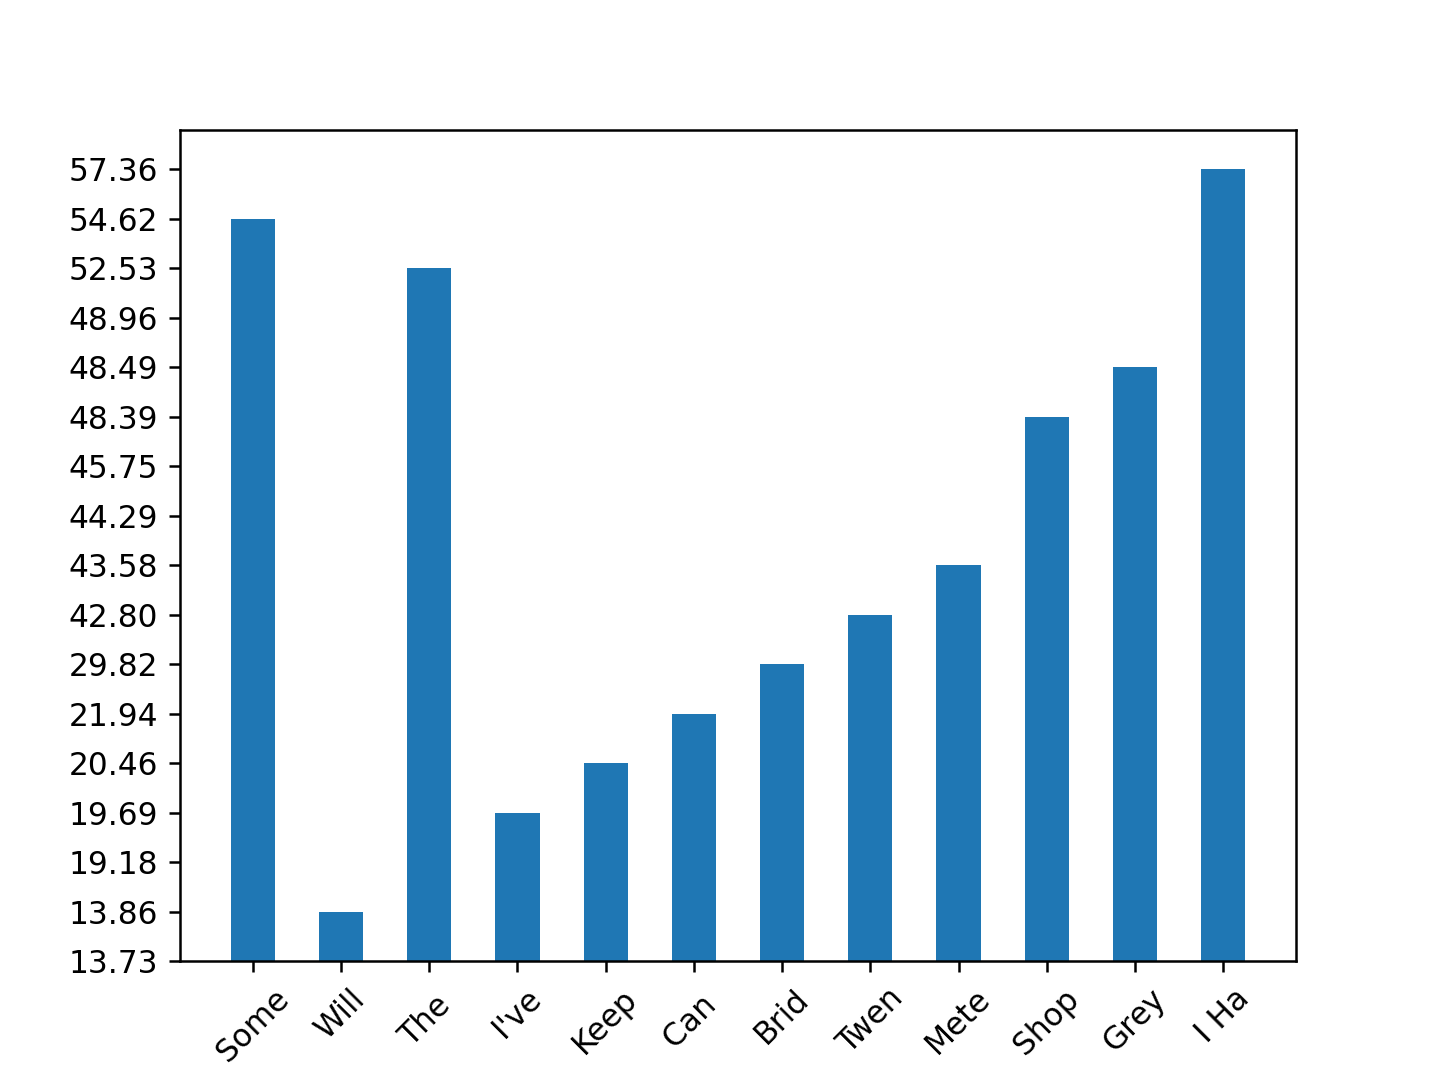

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

In [82]:
%matplotlib notebook
import matplotlib.pyplot as plt


#df["Title"] = df["Title"].apply(lambda x: x[:10])
plt.bar(df['Title'], df['Price'], width=0.5, align='center')
plt.xticks(rotation=45)